In [19]:
import libraries as lib
import geopandas as gpd
import pandas as pd
import rasterio as rio
import xarray as xr

!pip install openpyxl
import openpyxl

In [20]:
import os
from pathlib import Path
import geopandas as gpd
import pandas as pd
import numpy as np
import xarray as xr
import xrspatial.multispectral as ms
from xrspatial.focal import mean, focal_stats, hotspots
import stackstac
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from collections import OrderedDict
from shapely.geometry import shape
import rioxarray
from rasterio.crs import CRS
from rasterio.plot import show
import rasterio.features
import itertools
import cartopy.crs as ccrs
import rioxarray
import dask.array as da
import joblib
import xarray as xr
from geopandas import GeoDataFrame
from pandas import Series
from xarray import Dataset
from flox.xarray import xarray_reduce
import warnings

In [13]:
# Harold_34kn = gpd.read_file("Harold_VU_34kn.geojson").fillna(0).to_crs("EPSG:4326")
# Harold_50kn = gpd.read_file("Harold_VU_50kn.geojson").fillna(0).to_crs("EPSG:4326")
# Harold_64kn = gpd.read_file("Harold_VU_64kn.geojson").fillna(0).to_crs("EPSG:4326")

In [29]:
Harold_swaths = gpd.read_file("Harold_swaths_land.geojson").fillna(0).to_crs("EPSG:3857")

<Axes: >

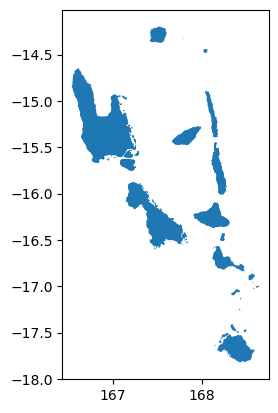

In [31]:
Harold_swathes.plot()

In [30]:
from shapely.geometry import MultiPolygon

# Function to calculate areas of individual polygons within a MultiPolygon
def calculate_area(geometry):
    if isinstance(geometry, MultiPolygon):
        # If it's a MultiPolygon, sum the areas of individual polygons
        return sum(poly.area for poly in geometry.geoms)
    else:
        # Otherwise, just return the area of the geometry
        return geometry.area

# Apply the function to calculate the area for each geometry
Harold_swaths['individual_areas'] = Harold_swaths.geometry.apply(calculate_area)

# print results
print(Harold_swaths['individual_areas'])

0    1.093229e+10
1    7.798898e+09
2    4.294403e+09
Name: individual_areas, dtype: float64


In [33]:
Harold_swaths['km2'] = Harold_swaths['individual_areas']/1000000

In [34]:
Harold_swaths

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,...,min,USA_R34_average,USA_R50_average,USA_R64_average,layer,path,Swath,geometry,individual_areas,km2
0,2020092S09155,2020,20,SP,EA,HAROLD,2020-04-01,MX,-9.2,154.9,...,0,0.0,0,0,Harold_swathe_34knots,C:/Users/nicholasm/OneDrive - SPC/Documents/20...,34,"MULTIPOLYGON (((18605260.197 -1761496.612, 186...",1.093229e+10,10932.286467
1,2020092S09155,2020,20,SP,EA,HAROLD,2020-04-01,MX,-9.2,154.9,...,0,0.0,0,0,Harold_swathe_50knots,C:/Users/nicholasm/OneDrive - SPC/Documents/20...,50,"MULTIPOLYGON (((18605260.197 -1761496.612, 186...",7.798898e+09,7798.897733
2,2020092S09155,2020,20,SP,EA,HAROLD,2020-04-01,MX,-9.2,154.9,...,0,0.0,0,0,Harold_swathe_64knots,C:/Users/nicholasm/OneDrive - SPC/Documents/20...,64,"MULTIPOLYGON (((18605260.197 -1761496.612, 186...",4.294403e+09,4294.402619
